<div class="alert alert-block alert-warning">
Ревью № 3:<br>
⚠️ Александр, в этой версии тоже встретились невыполненные ячейки, что затруднило проверку. Думаю, мои советы могли бы быть более развернутыми, если бы ты добавлял пояcнения к своим ячейкам, например, описывал, что ты хочешь получить после их выполнения.<br>
⚠️ Твой блокнот я перезапускал локально. Для интереса немного модифицировал код, чтобы добиться существенного сокращения времени лемматизации и получить метрику качества по F-мере выше 0.75. Ниже приведу примеры, если захочешь сделать это самостоятельно.
</div>

<div class="alert alert-block alert-warning">
⚠️ Ускорить лемматизацию можно за счет отказа от итерирования в цикле и использования более быстрой функции apply.
</div>

```python
%%time
df['text'] = df['text'].apply(lambda x : lemmatize(clear_text(x)))
```

```
Wall time: 4min 46s
```

<div class="alert alert-block alert-warning">
⚠️ Чуть менее пяти минут ушло на обработку всего массива без сокращения.
</div>

```python
# используем весь набор данных
# df = df.sample(df.shape[0]//10, random_state=12345).reset_index(drop=True)
```

<div class="alert alert-block alert-warning">
⚠️ Классические модели я затем обучал тоже на всем исходном датасете. Только, как и писал, ниже применял разные виды n-грамм. Наилучший результат был получен для 3-грамм:
</div>

```python
count_tf_idf = TfidfVectorizer(ngram_range=(1, 3), stop_words=stopwords)
```

<div class="alert alert-block alert-warning">
⚠️ Чтобы не раздувать признаковое пространство в функцию clear_text следует добавить lower(). Ведь в этой задаче, скорее всего, нет необходимости различать строчные и прописные буквы:
</div>

```python
def clear_text(text):
    pattern = r'[^a-zA-Z ]'
    replacement = ' '
    t = re.sub(pattern, replacement, text)
    return(' '.join(t.split()).lower())
```

<div class="alert alert-block alert-warning">
⚠️ Следующая модель дала наилучшее качество:
</div>

```python
%%time
model = LogisticRegression(class_weight='balanced', random_state=12345)
eval(model, {'penalty':['l2'], 'C' : [21.544], 'tol' : [0.001], 'max_iter' : [50, 100]})
```

```
F1 0.7849526776087216
{'C': 21.544, 'max_iter': 50, 'penalty': 'l2', 'tol': 0.001}
Wall time: 6min 40s
```

<div class="alert alert-block alert-success">
Остались ли у тебя вопросы? Или переводим работу в состояние "зачтено"?
</div>

<font color='blue' size=4><b>Комментарий ревьюера</b></font>

<font color='blue'>Привет, Александр! Меня зовут Денис Абрашин, и я рад проверять твой проект. Предлагаю общаться на «ты». Если тебе по душе другой стиль обращения, просто измени "настройки ревьюера" ниже. Они вступят в силу в следующий раз:</font>

- [x] общение на "ты"
- [ ] общение на "вы"

<font color='blue'>Мне уже не терпится взглянуть на твой проект в деталях, но по традиции давай в начале условимся об оформлении проверки, чтобы она была более наглядной и понятной. Для этого я буду использовать различные цвета и значки:</font>

<div class="alert alert-block alert-success">
✔️ <b>Зеленый текст</b> - все отлично
</div>

<div class="alert alert-block alert-warning">
⚠️ <b>Желтый текст</b> - сделано все правильно, однако есть рекомендации, на что стоит обратить внимание
</div>

<div class="alert alert-block alert-danger">
❌ <b>Красный текст</b> - есть недочеты, которые следует исправить для усвоения правильных навыков
</div>

---

<font color='blue'>Пожалуйста, не удаляй мои комментарии в случае возврата работы, так будет проще разобраться, какие были недочеты, и как они были исправлены.</font>

Ответы на мои комментарии при необходимости лучше тоже помечать вот так:

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
Текст комментария, вопроса, объяснения
</div>

Для этого просто добавь в блокнот ячейку markdown следующего содержания:<br>
```
<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
Текст комментария, вопроса, объяснения
</div>

```

<font color='blue'><b>Вперёд к новым знаниям! Каждый может!</b></font>

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span></li><li><span><a href="#LGBM" data-toc-modified-id="LGBM-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>LGBM</a></span></li><li><span><a href="#N-Gramm-with-LogisticRegression" data-toc-modified-id="N-Gramm-with-LogisticRegression-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>N-Gramm with LogisticRegression</a></span></li><li><span><a href="#BERT" data-toc-modified-id="BERT-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>BERT</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

In [1]:
# Пожалуйста, закомментируйте эту ячейку перед отправкой
#%pip install -q -r requirements-gpu.txt

In [2]:
# Пожалуйста, не изменяйте эту ячейку! Перед отправкой её комментировать не надо!
%pip install scikit-learn==0.22.1

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [ ]:
## BERT
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords as nltk_stopwords
from nltk.stem import WordNetLemmatizer 

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import TfidfVectorizer
import torch
import transformers
import numpy as np

from tqdm import notebook
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

import lightgbm as lgbm
from lightgbm import LGBMClassifier
import math
import warnings
warnings.filterwarnings('ignore')

# Проект для «Викишоп»

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

## Подготовка

In [6]:
df = pd.read_csv('/Users/a1234/Downloads/toxic_comments.csv')
df.head()

,text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0


In [7]:
df.shape

(159571, 2)

<div class="alert alert-block alert-success">
✔️ Данные загружены успешно.
</div>

<div class="alert alert-block alert-warning">
⚠️ <s>Если какие-то модели падают при обучении, можно в учебной задаче и подсократить набор данных. Он большой.</s>
</div>

Посмотрим на распределение целевой переменной:

<AxesSubplot:xlabel='toxic'>

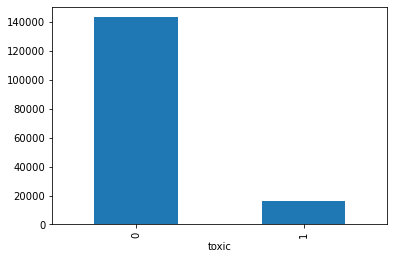

In [8]:
df.groupby(['toxic']).size().plot.bar()

Данные не сбалансированы:

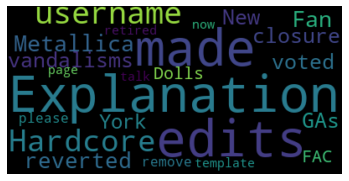

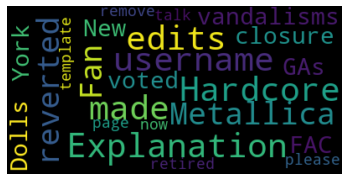

In [9]:
import os

from os import path
from wordcloud import WordCloud


# Generate a word cloud image
wordcloud = WordCloud().generate(df['text'][0])

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(df['text'][0])
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [10]:
corpus = df['text'].values.astype('U')

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
Добавил lower() в функцию clear_text:
</div>

In [11]:
%%time
%pip install nltk
nltk.download('wordnet')
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

def lemmatize(text):
    word_list = nltk.word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    lemm_text = ' '.join([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in word_list])
        
    return lemm_text


def clear_text(text):
    pattern = r'[^a-zA-Z ]'
    replacement = ' '
    t = re.sub(pattern, replacement, text)
    return(' '.join(t.split()).lower())
print("Исходный текст:", corpus[0])
print("Очищенный и лемматизированный текст:", lemmatize(clear_text(corpus[0])))

Note: you may need to restart the kernel to use updated packages.
Исходный текст: Explanation
Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27


[nltk_data] Downloading package wordnet to /Users/a1234/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Очищенный и лемматизированный текст: explanation why the edits make under my username hardcore metallica fan be revert they weren t vandalism just closure on some gas after i vote at new york doll fac and please don t remove the template from the talk page since i m retire now
CPU times: user 1.57 s, sys: 320 ms, total: 1.89 s
Wall time: 4.57 s


<div class="alert alert-block alert-danger">
❌ Ревью № 2: WordNetLemmatizer лемматизирует только по словам. Если передать ему предложение целиком, то он вернет его без изменений. Так по карайней мере для множесвенного числа получается (month, ages).
</div>

In [12]:
# код ревьюера для объяснения
demo_text = 'I had been working hard for months. Look at me. I worked hard for ages.'

print(lemmatize(clear_text(demo_text)))

demo_lemmatizer = WordNetLemmatizer()
print(' '.join(map(demo_lemmatizer.lemmatize, clear_text(demo_text.lower()).split())))

i have be work hard for month look at me i work hard for age
i had been working hard for month look at me i worked hard for age


In [13]:
lemmatize(clear_text(demo_text))

'i have be work hard for month look at me i work hard for age'

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
Заменил итерации на функцию:
</div>

In [14]:
%%time
%pip install nltk
nltk.download('wordnet')
df['text'] = df['text'].apply(lambda x : lemmatize(clear_text(x)))

Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package wordnet to /Users/a1234/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


CPU times: user 20min 46s, sys: 3min 19s, total: 24min 6s
Wall time: 24min 13s


In [15]:
corpus = df['text'].values.astype('U')

<div class="alert alert-block alert-danger">
❌ <s>Mystem предназначен для лемматизации текстов на русском языке. В данной задаче тексты на английском. Можешь подобрать подходящий <a href="https://webdevblog.ru/podhody-lemmatizacii-s-primerami-v-python/">здесь</a>.</s>
</div>

## TF-IDF

<div class="alert alert-block alert-danger">
❌ Ревью № 2: У TfidfVectorizer осталась утечка данных. Он обучается на всей выборке, а не на обучающей.
</div>

<div class="alert alert-block alert-warning">
⚠️ Ревью №2: У TfidfVectorizer тоже есть возможность управления n-граммами (ngram_range), как и у CountVectorizer.
</div>

<div class="alert alert-block alert-warning">
⚠️ Применение TF-IDF с параметрами по умолчанию даёт хороший результат на небольших датасетах. На больших текстах, не смотря на то, что ты уже избавился от стоп-слов английского языка, такое преобразование может привести к неоправданному увеличению словаря, а следовательно и признакового пространства. Взгляни на Размер матрицы: (159571, 189630). Сколько в ней столбцов? Не их ли большое количество может стать причиной падения некоторых алгоритмов?
<br>
⚠️ Не могу утверждать со стопроцентной уверенностью, но мне кажется, что новых признаков после применения преобразования TF-IDF очень много. Их было бы ещё больше, если бы ты не удалил ранее стоп-слова (ещё раз молодец!). Но ведь могли остаться ещё какие-нибудь малозначимые, характерные именно для отзывов о товарах.
<br>
⚠️ Вижу здесь хорошую возможность потренироваться в сокращении признакового пространства, управляя значениями max_df, min_df и max_features (не обязательно одновременно). Их назначение ты можешь найти в документации на TfidfVectorizer.
</div>

## Обучение

In [16]:
model = LogisticRegression(class_weight='balanced', random_state=12345, max_iter=1e6)

In [ ]:
%%time

best_score=0
bestnrgam = 0
for i in range(2,4):
    X_train, X_test, y_train, y_test = train_test_split(corpus, df['toxic'], test_size=0.25, random_state=12345)
    count_tf_idf = TfidfVectorizer(ngram_range=(1, i), stop_words=stopwords, max_df = 0.975)
    X_train = count_tf_idf.fit_transform(X_train)
    X_test = count_tf_idf.transform(X_test)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    score=f1_score(y_test, pred)
    if best_score<score:
        best_score=score
        bestnrgam = [1,i]
print(best_score, bestnrgam)

In [ ]:
nltk.download('stopwords')
stopwords = set(nltk_stopwords.words('english'))

X_train, X_test, y_train, y_test = train_test_split(corpus, df['toxic'], test_size=0.25, random_state=12345)

count_tf_idf = TfidfVectorizer(ngram_range=(1, 2), stop_words=stopwords, max_df = 0.975)
X_train = count_tf_idf.fit_transform(X_train)
X_test = count_tf_idf.transform(X_test)

In [ ]:
%pip install Image

<div class="alert alert-block alert-warning">
⚠️ Фиксирование (random_state=12345) обеспечит воспроизводимость результатов.
</div>

In [20]:
def eval(model, params):
    grid = GridSearchCV(model, param_grid=params, scoring='f1', n_jobs=-1)
    grid.fit(X_train, y_train)
    pred = grid.predict(X_test)                                                   
    accuracy = f1_score(y_test, pred)
    print('F1', accuracy)
    print(grid.best_params_)

In [21]:
%%time
model = LogisticRegression(class_weight='balanced', random_state=12345)
eval(model, {'max_iter' : np.logspace(1, 6, 5)})

F1 0.7525660624590522
{'max_iter': 177.82794100389228}
CPU times: user 1min 7s, sys: 17.1 s, total: 1min 24s
Wall time: 4min 33s


In [22]:
%%time
model = LogisticRegression(class_weight='balanced', max_iter=177,  random_state=12345)
eval(model, {'penalty':['l1', 'l2']})

F1 0.7525660624590522
{'penalty': 'l2'}
CPU times: user 1min 5s, sys: 16 s, total: 1min 21s
Wall time: 1min 30s


In [ ]:
%%time
model = LogisticRegression(class_weight='balanced', max_iter=177, penalty='l2', random_state=12345)
eval(model, {'C' : np.logspace(-2, 1, 4)})

In [ ]:
%%time
model = LogisticRegression(class_weight='balanced', max_iter=177, penalty='l2', C=10, random_state=12345)
eval(model, {'tol' : np.logspace(-6, 4, 3)})

<div class="alert alert-block alert-warning">
⚠️ Наш набор данных несбалансирован по целевой переменной (можешь сам в этом убедиться). Можно попробовать подобрать подходящий гиперпараметр class_weight для моделей.
</div>

## LGBM

In [ ]:
def score_(model, X_train, X_test, y_train, y_test, early_stopping_rounds, metric):  
    eval_set = [(X_test, y_test)]

    model.fit(
        X_train,
        y_train,
        eval_set=eval_set,
        early_stopping_rounds=early_stopping_rounds,
        eval_metric=metric)
    preds = model.predict(X_test)
    pred_labels = np.rint(preds)
    score = f1_score(y_test, pred_labels)
    return (score)

In [ ]:
%%time
model = LGBMClassifier(n_estimators=300, random_state=12345, n_jobs=-1)
score_(model, X_train, X_test, y_train, y_test, 100, 'f1')

In [ ]:
%%time
model = LGBMClassifier(is_unbalance=True, n_estimators=100, random_state=12345, n_jobs=-1)
eval(model, {'learning_rate':np.arange(0.1, 1, 0.5)})

<div class="alert alert-block alert-danger">
❌ <s>Далее я потерял ход твоей мысли. Обучение логистической регрессии происходит заново, а в некоторых ячейках ошибки. Исправь, пожалуйста. Может ты прислал не ту версию блокнота? С нетерпением жду новый вариант.</s>
</div>

## N-Gramm with LogisticRegression

In [ ]:
%%time
model = LogisticRegression(class_weight='balanced', random_state=12345, max_iter=1e6)
best_score=0
bestnrgam = 0
for i in range(2,4):
    X_train, X_test, y_train, y_test = train_test_split(corpus, df['toxic'], test_size=0.25, random_state=12345)
    count_vect = CountVectorizer(ngram_range=(1, i), stop_words=stopwords, max_df = 0.975, min_df = 0.005)
    X_train = count_vect.fit_transform(list(X_train))
    X_test = count_vect.transform(X_test)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    score=f1_score(y_test, pred)
    if best_score<score:
        best_score=score
        bestnrgam = [1,i]
print(best_score, bestnrgam)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(corpus, df['toxic'], test_size=0.25, random_state=12345)
count_vect = CountVectorizer(ngram_range=(1, 3), stop_words=stopwords, max_df = 0.975, min_df = 0.005)
X_train = count_vect.fit_transform(list(X_train))
X_test = count_vect.transform(X_test)
print("Размер:", X_train.shape, X_test.shape)

<div class="alert alert-block alert-danger">
❌ Идея с n-граммами очень хороша, можно пробовать и вариант (1, 2). Но делать это нужно после разбиения на обучающую и тестовую выборку. Применять fit только к обучающей, а transform к обеим. Так не будет "утечки данных".
</div>

<div class="alert alert-block alert-danger">
❌ Ревью № 2: Для TfidfVectorizer выше тоже нужно устранить утечку. Он ведь обучается на всей выборке, а не на обучающей. Метрика качества, наверняка, просядет, но так ты сможешь оценить реальную силу построенной модели.
</div>

In [ ]:
%%time
model = LogisticRegression(class_weight='balanced', random_state=12345)
eval(model, {'max_iter' : np.logspace(1, 6, 5)})

In [ ]:
%%time
model = LGBMClassifier(is_unbalance=True, n_estimators=100, random_state=12345, n_jobs=-1)
eval(model, {'learning_rate':np.arange(0.1, 1, 0.5)})

## BERT

In [ ]:
df = pd.read_csv('toxic_comments.csv')
df = df.sample(df.shape[0]//10, random_state=12345).reset_index(drop=True)

df_tweets = df.sample(3200, random_state=12345).reset_index(drop=True)
#df_tweets = df
data=[]
y = []
for i in range(len(df_tweets)):
    if len(df_tweets['text'][i])<=512:
        data.append(df_tweets['text'][i])
        y.append(df_tweets['toxic'][i])
#df_tweets = pd.DataFrame(data)
y = pd.DataFrame(y)
tokenizer = transformers.BertTokenizer(
    vocab_file='bert-base-uncased-vocab.txt')
tokenized = df_tweets['text'].apply(
    lambda x: tokenizer.encode(x, add_special_tokens=True, max_length=512, truncation=True))
df_tweets.shape, tokenized.shape, y.shape

In [ ]:
max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

padded = np.array([i + [0]*(max_len - len(i)) for i in tokenized.values])

attention_mask = np.where(padded != 0, 1, 0)
attention_mask.shape

In [ ]:
config = transformers.BertConfig.from_json_file(
    'config.json')
model = transformers.BertModel.from_pretrained('bert-base-uncased',
                                  config=config)

In [ ]:
%%time
batch_size = 100
embeddings = []
for i in notebook.tqdm(range(padded.shape[0] // batch_size)):
        batch = torch.LongTensor(padded[batch_size*i:batch_size*(i+1)]) 
        attention_mask_batch = torch.LongTensor(attention_mask[batch_size*i:batch_size*(i+1)])
        
        with torch.no_grad():
            batch_embeddings = model(batch, attention_mask=attention_mask_batch)
        
        embeddings.append(batch_embeddings[0][:,0,:].numpy())

In [ ]:
X = np.concatenate(embeddings) 
y = df_tweets['toxic']
print(X.shape, df_tweets['toxic'].shape)

In [ ]:
model = LogisticRegression(class_weight='balanced', random_state=12345, max_iter=1e6)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


In [ ]:
model.fit(X_train, y_train)
print(model.predict(X_test))
#print(model.score(y_test, model.predict(X_test)))
print('Accuracy', model.score(X_test, y_test))
print('F1:', f1_score(y_test, model.predict(X_test)))

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
Метрика F1 получилась хуже
</div>

## BertClassifier

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
Можешь ли мне привести пример кода для решения задачи с помощью берт без необходимости использовать классические модели для обучения, а работающие полностью на нейронных сетях. Я пытался сам несколько дней, пробовал код из разных источников, но не получилось.
</div>


<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
Код взял из https://towardsdatascience.com/text-classification-with-bert-in-pytorch-887965e5820f
</div>

In [ ]:
%pip install transformers
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

example_text = 'I will watch Memento tonight'
bert_input = tokenizer(example_text,padding='max_length', max_length = 10, 
                       truncation=True, return_tensors="pt")


print(bert_input['input_ids'])
print(bert_input['token_type_ids'])
print(bert_input['attention_mask'])

In [ ]:
!git clone https://huggingface.co/bert-base-cased

# if you want to clone without large files – just their pointers
# prepend your git clone with the following env var:
GIT_LFS_SKIP_SMUDGE=1

In [ ]:
import torch
import numpy as np
from transformers import BertTokenizer

#tokenizer = BertTokenizer.from_pretrained('bert-base-cased')
labels = {1:1,
          0:0,
          
          }

class Dataset(torch.utils.data.Dataset):

    def __init__(self, df):

        self.labels = [labels[label] for label in df['toxic']]
        self.texts = [tokenizer(text, 
                               padding='max_length', max_length = 512, truncation=True,
                                return_tensors="pt") for text in df['text']]

    def classes(self):
        return self.labels

    def __len__(self):
        return len(self.labels)

    def get_batch_labels(self, idx):
        # Fetch a batch of labels
        return np.array(self.labels[idx])

    def get_batch_texts(self, idx):
        # Fetch a batch of inputs
        return self.texts[idx]

    def __getitem__(self, idx):

        batch_texts = self.get_batch_texts(idx)
        batch_y = self.get_batch_labels(idx)

        return batch_texts, batch_y

In [ ]:
np.random.seed(112)
df_train, df_val, df_test = np.split(df.sample(frac=1, random_state=42), 
                                     [int(.8*len(df)), int(.9*len(df))])

print(len(df_train),len(df_val), len(df_test))

In [ ]:
from torch import nn
from transformers import BertModel

class BertClassifier(nn.Module):

    def __init__(self, dropout=0.5):

        super(BertClassifier, self).__init__()

        self.bert = BertModel.from_pretrained('bert-base-cased')
        self.dropout = nn.Dropout(dropout)
        self.linear = nn.Linear(768, 5)
        self.relu = nn.ReLU()

    def forward(self, input_id, mask):

        _, pooled_output = self.bert(input_ids= input_id, attention_mask=mask,return_dict=False)
        dropout_output = self.dropout(pooled_output)
        linear_output = self.linear(dropout_output)
        final_layer = self.relu(linear_output)

        return final_layer

In [ ]:
from torch.optim import Adam
from tqdm import tqdm

def train(model, train_data, val_data, learning_rate, epochs):

    train, val = Dataset(train_data), Dataset(val_data)

    train_dataloader = torch.utils.data.DataLoader(train, batch_size=2, shuffle=True)
    val_dataloader = torch.utils.data.DataLoader(val, batch_size=2)

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    criterion = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr= learning_rate)

    if use_cuda:

            model = model.cuda()
            criterion = criterion.cuda()

    for epoch_num in range(epochs):

            total_acc_train = 0
            total_loss_train = 0

            for train_input, train_label in tqdm(train_dataloader):

                train_label = train_label.to(device)
                mask = train_input['attention_mask'].to(device)
                input_id = train_input['input_ids'].squeeze(1).to(device)

                output = model(input_id, mask)
                
                batch_loss = criterion(output, train_label)
                total_loss_train += batch_loss.item()
                
                acc = (output.argmax(dim=1) == train_label).sum().item()
                total_acc_train += acc

                model.zero_grad()
                batch_loss.backward()
                optimizer.step()
            
            total_acc_val = 0
            total_loss_val = 0

            with torch.no_grad():

                for val_input, val_label in val_dataloader:

                    val_label = val_label.to(device)
                    mask = val_input['attention_mask'].to(device)
                    input_id = val_input['input_ids'].squeeze(1).to(device)

                    output = model(input_id, mask)

                    batch_loss = criterion(output, val_label)
                    total_loss_val += batch_loss.item()
                    
                    acc = (output.argmax(dim=1) == val_label).sum().item()
                    total_acc_val += acc
            
            print(
                f'Epochs: {epoch_num + 1} | Train Loss: {total_loss_train / len(train_data): .3f} \
                | Train Accuracy: {total_acc_train / len(train_data): .3f} \
                | Val Loss: {total_loss_val / len(val_data): .3f} \
                | Val Accuracy: {total_acc_val / len(val_data): .3f}')
                  
EPOCHS = 5
model = BertClassifier()
LR = 1e-6
              
train(model, df_train, df_val, LR, EPOCHS)

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
Не понимаю, в чем здесь ошибка и как это исправить?
</div>

In [ ]:
def evaluate(model, test_data):

    test = Dataset(test_data)

    test_dataloader = torch.utils.data.DataLoader(test, batch_size=2)

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    if use_cuda:

        model = model.cuda()

    total_acc_test = 0
    with torch.no_grad():

        for test_input, test_label in test_dataloader:

              test_label = test_label.to(device)
              mask = test_input['attention_mask'].to(device)
              input_id = test_input['input_ids'].squeeze(1).to(device)

              output = model(input_id, mask)

              acc = (output.argmax(dim=1) == test_label).sum().item()
              total_acc_test += acc
    
    print(f'Test Accuracy: {total_acc_test / len(test_data): .3f}')
    
evaluate(model, df_test)

<div class="alert alert-block alert-danger">
❌ Ревью № 2: Не могу оценить результат выполнения ячейки с ошибкой. BERT является факультативной задачей. Если времени мало, то я готов поставить зачет по модели с TF-IDF, только устрани утечку данных.
</div>

## Выводы

Обучена модель для классифицикации комментариев на позитивные и негативные.Построена модель со значением метрики качества F1 не меньше 0.75

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Данные загружены и подготовлены
- [ ]  Модели обучены
- [ ]  Значение метрики *F1* не меньше 0.75
- [ ]  Выводы написаны

In [ ]:
#!c1.4
